<a href="https://colab.research.google.com/github/helendc/COMP488_Assignment1/blob/master/TeamNuAssignment1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
1.   Import necessary packages
2.   Mount Google Drive to Google Colab
3.   Load register data into Colab









In [ ]:
# Install packages
!pip install pickle5
import pandas as pd
import pickle5 as pickle
import numpy as np
from tabulate import tabulate
import altair as alt

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import os

     |████████████████████████████████| 133kB 5.7MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219258 sha256=cb74e1e8ba22624617edc4cb4fc282b7157f948d7c639e4338a4402332124107
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
PATH = "/content/drive/My Drive/BUSICOMP488-Spring2021-Assignment1-Section003-TeamNu"

Mounted at /content/drive


In [ ]:
# Load the data
file_name = '488-2021-Assignment1-Coffee_CashierLog-2018-2020.pkl'
path_to_embed = os.path.join(PATH, file_name)

data = pickle.load(open(path_to_embed, 'rb'))

# Overview


### Background and Introduction

### Table of Content
Part I: Data Cleaning and Data Wrangling  
1. Data Cleaning
2. Data Wrangling

Part II: Data Analysis  
1. Sales Analysis
2. Profitability Analysis  
3. Cost & Revenue Analysis
4. Consumer Preference Analysis
  * 4.1 Weekdays vs Weekends
  * 4.2 Seasonality
  * 4.3 Pre-Covid vs Now
5. Hour, Frequency???

Part III: Summary of Recommendations

# Part I: Data Cleaning and Wrangling

## Data Cleaning
1.   Format dataframe with DatetimeIndex
2.   Remove unnecessary columns
  *   Category
  *   Notes
  *   Unit
  *   CustomerID
3.   Convert `dtypes` of Discount and Gross Sales columns to `float64`





In [ ]:
# Create DateTimeIndex
df = data.copy()

In [ ]:
# Remove unnecessary columns
df.drop(columns=['SKU', 'Notes', 'Unit', 'CustomerID'], inplace=True)

In [ ]:
# Strip Discounts and Gross Sales columns and convert to floats
# Note: Running this cell more than once will produce an error
df[['Gross Sales','Discounts']] = df[['Gross Sales', 'Discounts']].replace({'[\$,\)]':'','\(':'-'}, regex=True).astype('float')

## Data Wrangling
1.   Sorting Items into one of the following categories for a more informative grouping of products:
  *   Latte
  *   Cold Coffee
  *   Hot Coffee
  *   Decaf Coffee
  *   Coffee of the Day
  *   Tea
  *   Seasonal Drinks
  *   Promotion
  *   Breakfast
  *   Desserts
  *   Snacks
  *   Baked Goods
  *   Display Fridge
  *   Accessories
  *   Mugs
2.   Determining the cost of items
  *   Initalize "Cost" column, cost functions, and relevant variables
  *   Set cost value for items
3.   Creating a "Profit" column
  *   Profit = Gross Sales - Cost + Discounts
  *   For all modified drinks, we assumed $0.50 increase in costs (based on NEED CONFIRMATION FROM ELLEN)

**1. ReGrouping Items into more Informative Categories**

> Upon initial plotting, we found the original categories were not very informative for our analysis. Below we recategorize the items into different gourps that are more useful for our analysis.



In [ ]:
# Latte
df.loc[(df.Item.str.contains('Latte'))&(df.Category != 'Seasonal Drinks'),'Category']='Latte'

# Cold Coffee
df.loc[(df.Item.str.contains('Chiller')&df.Item.str.contains('Coffee')), 'Category'] = "Cold Coffee"
df.loc[df.Item.str.contains('Mocha|White Mocha|Iced Mocha|Iced White Mocha|Mint Mocha|Iced Hazelnut Bliss|Iced Coffee|Cold Brew'),'Category']="Cold Coffee"

# Hot Coffee
df.loc[(df.Item.str.contains('Americano|Cappuccino|Cafe|Macchiato|Blend|Roast|Classic Steamer|Don|Espresso|Pour Over|Refill|Daylight Coffee|Coffee To Go|French Press|Red Eye|Breve|Jamaican|Kenya|Carolina Rain')), 'Category'] = "Hot Coffee"
df.loc[(df.Item == 'Vanilla Cream'),'Category'] = "Hot Coffee"
df.loc[(df.Category.str.contains('Coffee Bean Blend|Coffee Bean Flavor|Coffee Bean Single Origin')), 'Category'] = 'Hot Coffee'

# Decaf Coffee
df.loc[(df.Category == 'Coffee Bean Decaf'), 'Category'] = "Decaf Coffee"
df.loc[df.Item.str.contains('Hot Chocolate|Kids Hot Chocolate|White Hot Chocolate|Flavored Milk|Cocunut Cream'),'Category']="Decaf Coffee"

# Coffee of the Day
df.loc[(df.Item.str.contains('Coffee of the Day')), 'Category'] = "Coffee of the Day"

# Tea
df.loc[(df.Item.str.contains('Chiller')&df.Item.str.contains('Tea')), 'Category'] = "Tea"
df.loc[(df.Item.str.contains('Tea|tea|Loose Leaf Tea|Tea Accessories|Refresher|Rooibos|Hibiscus Cut|Jade Oolong Green|Herbal|Tumeric Chi|Yrgacheffe')), 'Category'] = "Tea"
df.loc[(df.Category.str.contains('Loose Leaf Tea'))|(df.Category.str.contains('Tea Accessories')), 'Category'] = 'Tea'

# Seasonal Drinks
df.loc[(df.Category.str.contains('Wheeler Seasonal|Summer Seasonal')), 'Category'] = 'Seasonal Drinks'

# Promotion
df.loc[df.Category.str.contains('Promotion|LoLo'), 'Category']='Promotion'

# Breakfast
df.loc[df.Item.str.contains('Bagel|Oat|Muffin|Croissant|Egg|Omelette'), 'Category'] = 'Breakfast'
df.loc[df.Category.str.contains('Sandwich'), 'Category'] = 'Breakfast'

# Desserts
df.loc[df.Item.str.contains('Cake|Cobbler|Cheesecake|Shortbread|Blondie|Brownie|Brulee|Praline|Pie|Cookie|Choo|Macaroons|Snickerdoodel|Moose|Biscotti'),"Category"]="Desserts"

# Snacks
df.loc[df.Item.str.contains('Bar|BAR|Kind|Nuts|Belvita|Plantain|Chips|Ritter|Cassava|String|Almonds|Gum|Pecans|Nutella|OhYeah|ONE|Oreo'),'Category']="Snacks"
df.loc[df.Category.str.contains('Counter Top'),'Category']="Snacks"

# Baked Goods: pre-categorized

# Display Fridge
df.loc[(df.Item.str.contains('Chiller')& df.Category.str.contains('Drink')), 'Category'] = 'Display Fridge'
df.loc[df.Item.str.contains('Shakes|Juice|Coca|Sprite|Soda|Yogurt|Smoothie|Sandwhich|Lunch|Bottle|Dasani|Lolo|Gatorade|Bai|Lemonade|Fairlife|Fair Life'),'Category']="Display Fridge"
df.loc[df.Category.str.contains('From the Barista|kids Drink|Cool Drink'),'Category']="Display Fridge"

# Accessories:
df.loc[(df.Category.str.contains('None')), "Category"] = 'Miscellaneous'

# Mugs
df.loc[(df.Item.str.contains('Mug|mug')), 'Category'] = 'Mugs'

# Check Categories' value counts
df.Category.value_counts()

Latte                18848
Coffee of the Day    18781
Cold Coffee          13913
Hot Coffee           11549
Breakfast             7987
Display Fridge        6774
Desserts              3766
Tea                   3537
Decaf Coffee          2466
Snacks                1956
Baked Goods           1636
Miscellaneous          428
Seasonal Drinks        182
Accessories             30
Promotion               16
Mugs                    11
Name: Category, dtype: int64

**2. Creating a column for the costs of items**

> The three functions `cost_setter`, `cost_setter_ad`, and `cost_adder` map the cost information provided to each row in the dataframe.

In [ ]:
# Column and variable initialization
df['Costs'] = 0
modifier_costs = 0.05
counter_top_margin = 0.4
other_margin = 0.6

# Simple cost setting function
def cost_setter(df,guess,price,*exclude):
  criteria = False * df.size
  for x in guess:
    criteria = criteria | df["Item"].str.contains(x)
  for y in exclude:
    criteria = criteria & ~df["Item"].str.contains(y)
  df.loc[criteria,'Costs']=price

# Advanced cost setting function
def cost_setter_ad(df,criteria,price,*size):
  if size =="s":
    df.loc[criteria & (df["Price Point Name"]=="12oz"),'Costs']=price
  elif size =="m":
    df.loc[criteria & (df["Price Point Name"]=="16oz"),'Costs']=price
  elif size =="l":
    df.loc[criteria & (df["Price Point Name"]=="20oz"),'Costs']=price
  else:
    df.loc[criteria,'Costs']=price

# Cost adder
def cost_adder(df,criteria,add):
    df.loc[criteria,'Costs'] = df.loc[criteria,'Costs']+add

In [ ]:
# Cost setting rules for drinks

#Latte: Item==Latte
cost_setter_ad(df,df["Item"]=="Latte",0.5515,"s")
cost_setter_ad(df,df["Item"]=="Latte",0.6503,"m")
cost_setter_ad(df,df["Item"]=="Latte",0.9792,"l")

#Mocha/White mocha: Name contains mocha
cost_setter_ad(df,df["Item"].str.contains('Mocha'),0.79,"s")
cost_setter_ad(df,df["Item"].str.contains('Mocha'),1.00,"m")
cost_setter_ad(df,df["Item"].str.contains("Mocha"),1.45,"l")

#Matcha/Chai: Name contains Matcha and Chai
cost_setter_ad(df,df["Item"].str.contains('Matcha') | df["Item"].str.contains('Chai'),1.12,"s")
cost_setter_ad(df,df["Item"].str.contains('Matcha') | df["Item"].str.contains('Chai'),1.22,"m")
cost_setter_ad(df,df["Item"].str.contains("Matcha") | df["Item"].str.contains('Chai'),1.55,"l")

#Flavored Latte: Name contains Latte, but not assigned a price above
cost_setter_ad(df,df["Item"].str.contains('Latte') & (df["Costs"]==0),0.7529,"s")
cost_setter_ad(df,df["Item"].str.contains('Latte') & (df["Costs"]==0),0.9188,"m")
cost_setter_ad(df,df["Item"].str.contains('Latte') & (df["Costs"]==0),1.3149,"l")

#Chiller: name contains chiller
cost_setter_ad(df,df["Item"].str.contains("Chiller"),1.25,"m")
cost_setter_ad(df,df["Item"].str.contains("Chiller"),1.47,"l")

#Smoothie: name contains smoothie
cost_setter_ad(df,df["Item"].str.contains("Smoothie"),1.15,"m")
cost_setter_ad(df,df["Item"].str.contains("Smoothie"),1.54,"l")

#Cold brew
cost_setter_ad(df,df["Item"].str.contains('Cold Brew'),6.96/128*12,"s")
cost_setter_ad(df,df["Item"].str.contains('Cold Brew'),6.96/128*16,"m")
cost_setter_ad(df,df["Item"].str.contains("Cold Brew"),6.96/128*20,"l")

#Drip coffee = Coffee of the Day
cost_setter_ad(df,df["Item"].str.contains('Coffee of the Day')|df["Item"].str.contains('Americano')|df["Item"].str.contains('Daylight Coffee'),3.96/128*12,"s")
cost_setter_ad(df,df["Item"].str.contains('Coffee of the Day')|df["Item"].str.contains('Americano')|df["Item"].str.contains('Daylight Coffee'),3.96/128*16,"m")
cost_setter_ad(df,df["Item"].str.contains("Coffee of the Day")|df["Item"].str.contains('Americano')|df["Item"].str.contains('Daylight Coffee'),3.96/128*20,"l")

#Espresso: 0.5 lb = 8 oz = 8 shots, 1 quad = 4 shots
for size in df[df["Item"].str.contains('Espresso')]['Price Point Name'].unique():
  if size == 'Double shot':
    cost_setter_ad(df,df["Item"].str.contains("Espresso") & (df['Price Point Name'] == size),0.35*2)
  elif (size == '0.5 LB')| (size == '0.5lb'):
    cost_setter_ad(df,df["Item"].str.contains("Espresso") & (df['Price Point Name'] == size),0.35*8)
  elif size == 'Quad':
    cost_setter_ad(df,df["Item"].str.contains("Espresso") & (df['Price Point Name'] == size),0.35*4)
  elif size == 'Triple shot':
    cost_setter_ad(df,df["Item"].str.contains("Espresso") & (df['Price Point Name'] == size),0.35*3)
  elif (size == '1 LB')|(size == '1lb'):
    cost_setter_ad(df,df["Item"].str.contains("Espresso") & (df['Price Point Name'] == size),0.35*16)
  else:
    print("size not found in espresso", size)

# Modifier Costs Adjustment
cost_adder(df,~df["Modifiers Applied"].isnull(),modifier_costs)

In [ ]:
# Cost setting rules for other items

# Mixed Nuts
cost_setter(df,['Pecans','Pecan','Nuts',"Nut"],0.78,('Nutella'))
# Protein Bars
cost_setter(df,['Bar'],1)
# KIND
cost_setter(df,['KIND'],0.94)
# Juice
cost_setter(df,['juice'],0.54)
# Protein shake
cost_setter(df,['Protein Shakes','Protein'],1.49)
# Granola
cost_setter(df,['granola'],1.00)
# Muffins
cost_setter(df,['Muffin','Blueberry'],1.12)
# Cinnamon rolls
cost_setter(df,['Cinnamon Rolls'],1.47)
# Danish
cost_setter(df,['Danish'],0.99)
# Crumb cake / Brownie / Blondie
cost_setter(df,['Brownie','cake','Blondie'],0.79)
# Cookie: $0.48 
cost_setter(df,['cookie'],0.48)
# Macarons: $0.69 
cost_setter(df,['Macarons'],0.69)
# Scones: $1.29 
cost_setter(df,['scones'],1.29)
# Canelé: $0.69 
cost_setter(df,['Canele'],0.69)
# Biscotti: $0.69 
cost_setter(df,['Biscotti'],0.69)
# Oats: $1.50 
cost_setter(df,['oats'],1.5)
# Yoghurt (greek): $0.42 
cost_setter(df,['yoghurt'],0.442)
# Cheese and Nuts: $1.65 
cost_setter(df,['Cheese and Nuts'],1.65)
# Croissant: $0.41 
cost_setter(df,['Croissant'],0.41)
# Bagel: $0.66 
cost_setter(df,['Bagel'],0.66)
# English muffins: $0.32 
cost_setter(df,['English muffins'],0.32)
# Egg patties $0.25 
cost_setter(df,['Egg patties'],0.25)
# Sausage patties: $0.31 
cost_setter(df,['Sausage patties'],0.31)
# Omelet patty: $0.62 
cost_setter(df,['Omelet patty'],0.62)

# Cost setting rules for sandiwches
# Chicken: $1.54 
cost_adder(df,df["Item"].str.contains('Chicken'),1.54)
# Bacon: $1.78 
cost_adder(df,df["Item"].str.contains('Bacon'),1.78)
# Cheese $0.17 
cost_adder(df,df["Item"].str.contains('Cheese'),0.17)
# Spinach $0.11 
cost_adder(df,df["Item"].str.contains('Spinach'),0.11)
# Feta $0.33 
cost_adder(df,df["Item"].str.contains('Feta'),0.33)
# Avocado: $0.55 
cost_adder(df,df["Item"].str.contains('Avocado'),0.55)
# Pesto: $0.32 
cost_adder(df,df["Item"].str.contains('Pesto'),0.32)

# Uncategorized Costs Adjustment
for item in df[df["Costs"]==0]['Item'].unique():
  df.loc[(df["Item"]==item),"Costs"] =  df[(df["Item"]==item)]["Gross Sales"].mean() * (1-other_margin)
  df.loc[(df["Item"]==item)&(df["Category"]=="Counter Top"),"Costs"] =  df[(df["Item"]==item)&(df["Category"]=="Counter Top")]["Gross Sales"].mean() * (1-counter_top_margin)

df['Costs'] = df['Costs']*df['Qty']

**3. Determining the profit per transaction** 

> Profit = gross sales - costs + discounts.
The reason we added discounts back in was because they were already recorded as negative amounts. 
For refund transactions, the costs were equal to the cost of the item. Here, we are assuming that the product was given but not paid for (i.e. vendor bears the costs). 

In [ ]:
# Determine profit per transaction
df['Profit'] = df['Gross Sales'] - df["Costs"] + df['Discounts']
df.loc[(df['Costs']==0), 'Profit'] = 0

# Manage profit record of refunds
df.loc[(df['Event Type'] == 'Refund'), 'Profit'] = df.loc[(df['Event Type'] == 'Refund')]['Costs']*-1

In [ ]:
# Units Sold, Revenue, and Profit by Category
cats = df.groupby('Category').agg( UnitsSold=('Qty', 'count'), Revenue=('Gross Sales', 'sum'), Profit=('Profit', 'sum')).copy()
cats.reset_index(inplace=True)
cats

,Category,UnitsSold,Revenue,Profit
0,Accessories,30,256.00,122.040000
1,Baked Goods,1636,4496.47,2260.066667
2,Breakfast,7987,28760.75,18480.465400
3,Coffee of the Day,18781,45847.30,30842.180000
4,Cold Coffee,13913,59790.70,35542.701556
5,Decaf Coffee,2466,8642.70,4492.393706
6,Desserts,3766,11585.97,6889.790663
7,Display Fridge,6774,23720.70,12981.968349
8,Hot Coffee,11549,53327.27,29792.127314
9,Latte,18848,79940.30,54777.986800


# Part II: Analysis

## 1. Gross Sales Analysis
In this section we will plot the following using the Categories we made after regrouping items: 

*   Linear Freq. Dist. of Categories
*   Log. Freq. Dist. of Categories + Linear Freq. Dist. of Gross Sales/Category


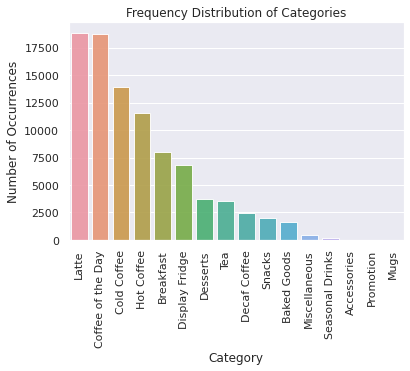

In [ ]:
# Linear Frequency Distribution of Categories
cat_count = df['Category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = cat_count.index, y = cat_count.values, alpha=0.9)
plt.title('Frequency Distribution of Categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()

 From this chart we can see the total number of times the items in each of our defined categories were purchased. Next, we will look into how Gross Sales correspond to number of items sold. 

In [ ]:
# Logarithmic Frequency Distribution of Categories AND Linear Frequency Distribution of Gross Sales
sItems = df[['Category','Item','Gross Sales']].value_counts().reset_index(name='count')
brush = alt.selection(type='interval', encodings=['x'])

logcount = alt.Chart(sItems).mark_bar().encode(
    x=alt.X('Category:N', sort = '-y'),
    y=alt.Y('sum(count)',scale=alt.Scale(type='log')),
    color=alt.condition(brush, alt.value('steelblue'),alt.value('lightgray'))
).add_selection(brush)

gross_sales = alt.Chart(sItems).mark_bar().encode(
    x=alt.X('Category:N', sort = '-y'),
    y=alt.Y('sum(Gross Sales):Q'),
    color=alt.condition(brush, alt.value('olive'),alt.value('lightgray'))
).add_selection(brush)

logcount & gross_sales

alt.VConcatChart(...)

Now, by plotting the total number of purchases within each category side by side with the total sales from each category, we can retreive more insights. 



> For example, if we highlight the Hot Coffee category on either graph, we see that while this category is the 4th highest in number of slaes, it creates a significantly greater sale for the bakery.



> If we instead highlight Tea, we see that while Tea falls in the middle section of number of sales per category, it does fairly well in terms of gross sales. Decaf Coffee on the other hand, does not do as well in gross sales as one would expect looking at the number of sales made in this category. 



## 2. Profitability Analysis 

In this section we will analyze profit. 

Profit = Gross sales - Costs*Qty + Discounts


#### Key Assumptions:
1. For all modified drinks, I assume $0.5 increase in costs (taking from an average)
2. For all items that does not have the costs, I assume 40% profit margin for over-the-counter, and 60% for others

##### **Justification** for Assumption 2

The total profit of the log is USD 108,983.14 and the total revenue is USD 334,870.55. In the freq. dist. of profit margins for each item (below), we can see that the magority of the profit margin is around 0.6 - 0.8.


In [ ]:
# Justification
print("Profit:", df['Profit'].sum())
print("Revenue:", df['Gross Sales'].sum())

Profit: 206749.9365405762
Revenue: 334870.55000000005


#### *Profit Margin Analysis*

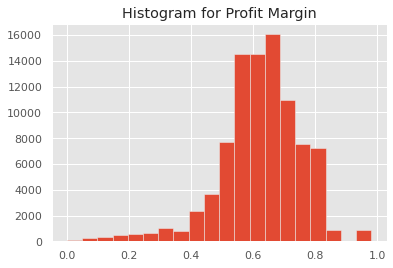

In [ ]:
# Profit Margin:
df["Profit Margin"] = df["Profit"]/df["Gross Sales"]

# clean the profit margin for gross sales = 0
df.loc[(df["Profit Margin"]<-1000),"Profit Margin"] = 0

# histogram of profit margin
plt.style.use('ggplot')
plt.hist(df[(df["Profit Margin"]>0) & (df["Profit Margin"]<1.2)]["Profit Margin"],bins=20)
plt.title("Histogram for Profit Margin")
plt.show()

In the graph above we can see the frequency of profit margins. Around 52.7% of items have a profit margin between 60% and 80%. Looking below, we further analyzed the profit margins by category.

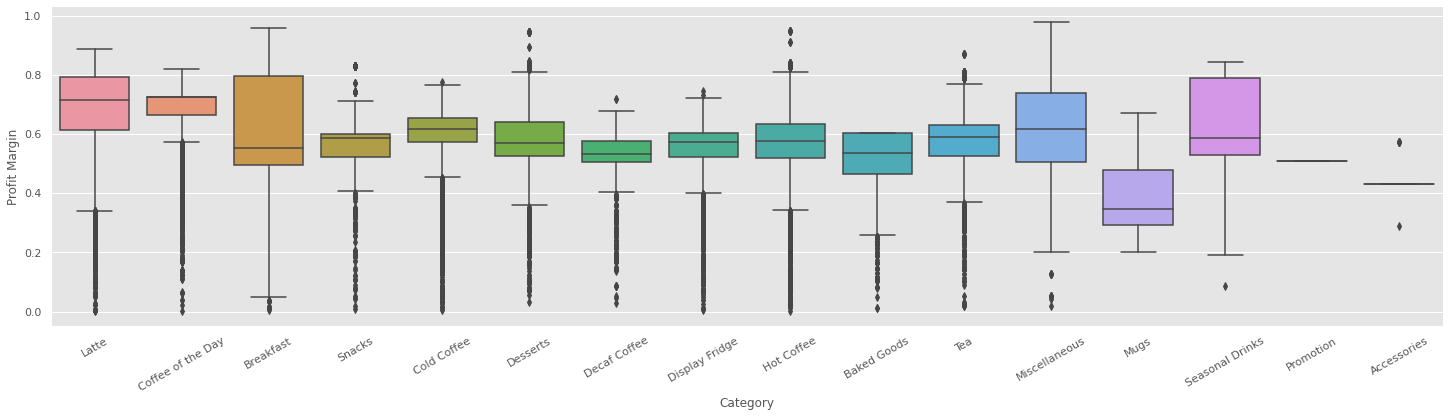

In [ ]:
box_margin_plot = sns.catplot(x="Category",y="Profit Margin",data = df[(df["Profit Margin"]>0) & (df["Profit Margin"]<1.2)],aspect=4, kind ="box")
box_margin_plot.set_xticklabels(rotation=30)

Looking at the series of box plots above, we can see that "Coffee of the Day" has the highest median profit margin, but it also has a lot of outliers. "Latte" has the second highest median profit margin with a fair number of outliers, but a much larger range (going as low as 0.35).

## 3. Cost & Revenue Analysis

Similar to analysis between Gross Sales and Number of Sales per Category, we will now analyze the Cost of items per Category compared to the number of items sold per Category. This will give us a better understanding of the value in revenue for each Category and aid us in our recommendation. 


In [ ]:
# Logarithmic Frequency Distribution of Categories AND Linear Frequency Distribution of Costs
sItems = df[['Category','Item','Costs']].value_counts().reset_index(name='count')
brush = alt.selection(type='interval', encodings=['x'])

logcount = alt.Chart(sItems).mark_bar().encode(
    x=alt.X('Category:N', sort = '-y'),
    y=alt.Y('sum(count)',scale=alt.Scale(type='log')),
    color=alt.condition(brush, alt.value('steelblue'),alt.value('lightgray'))
).add_selection(brush)


costs = alt.Chart(sItems).mark_bar().encode(
    x=alt.X('Category:N', sort = '-y'),
    y=alt.Y('sum(Costs):Q'),
    color=alt.condition(brush, alt.value('olive'),alt.value('lightgray'))
).add_selection(brush)

logcount & costs

alt.VConcatChart(...)

By plotting the total number of purchases within each category side by side with the total costs for each category, we can retreive more insights.

> For example, the Baked Goods Category costs is extremely low in relation to other categories, but the number of items sold within this Category is decently in the middle, an impressive amount for the cost to supply the products.

> Futhermore, the items in the Display Fridge may be worth cutting back on since the sum of the costs is on the heavier side and this is not the most popular category in terms of number of products sold. 

> Another insight can be found in the Cold Coffee section, which shows that Cold Coffee is a very popular seller yet takes a relatively lower cost compared to some other drink categories like Hot Coffee. 


## 4 Consumer Preference Analysis

Given the majority of the consumers being students and faculties at UNC, how do the consumers shift their coffee preference between weekday and weekends, school days and vocations, and by seasons.  

The purpose of this analysis is to create a better **"Recommended for Today"** menu that promote the items fit the best for consumers.

#### 4.1 *Weekdays and Weekends*

In [ ]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df["Weekday"] = df['TimeStamp'].dt.dayofweek
df["isWeekend"] = (df["Weekday"] == 5) | (df["Weekday"] == 6)
df["Date"] = df['TimeStamp'].dt.date

In [ ]:
df_wknd = df.groupby(["isWeekend","Category","Date"])['Gross Sales'].sum().reset_index()
df_wknd['Category'].astype('category')
df_wknd['Date'] = pd.to_datetime(df_wknd['Date'])
df_wknd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   isWeekend    7807 non-null   bool          
 1   Category     7807 non-null   object        
 2   Date         7807 non-null   datetime64[ns]
 3   Gross Sales  7807 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 190.7+ KB


In [ ]:
df_wk = df.groupby(["Date","Weekday","Category"])['Gross Sales'].sum().reset_index()
df_wk['Category'].astype('category')
df_wk['Date'] = pd.to_datetime(df_wk['Date'])
df_wk.head(20)

,Date,Weekday,Category,Gross Sales
0,2018-10-05,4,Baked Goods,3.99
1,2018-10-05,4,Breakfast,15.00
2,2018-10-05,4,Coffee of the Day,56.10
3,2018-10-05,4,Cold Coffee,86.05
4,2018-10-05,4,Decaf Coffee,16.10
5,2018-10-05,4,Desserts,13.79
6,2018-10-05,4,Display Fridge,44.20
7,2018-10-05,4,Hot Coffee,54.74
8,2018-10-05,4,Latte,127.70
9,2018-10-05,4,Miscellaneous,0.47


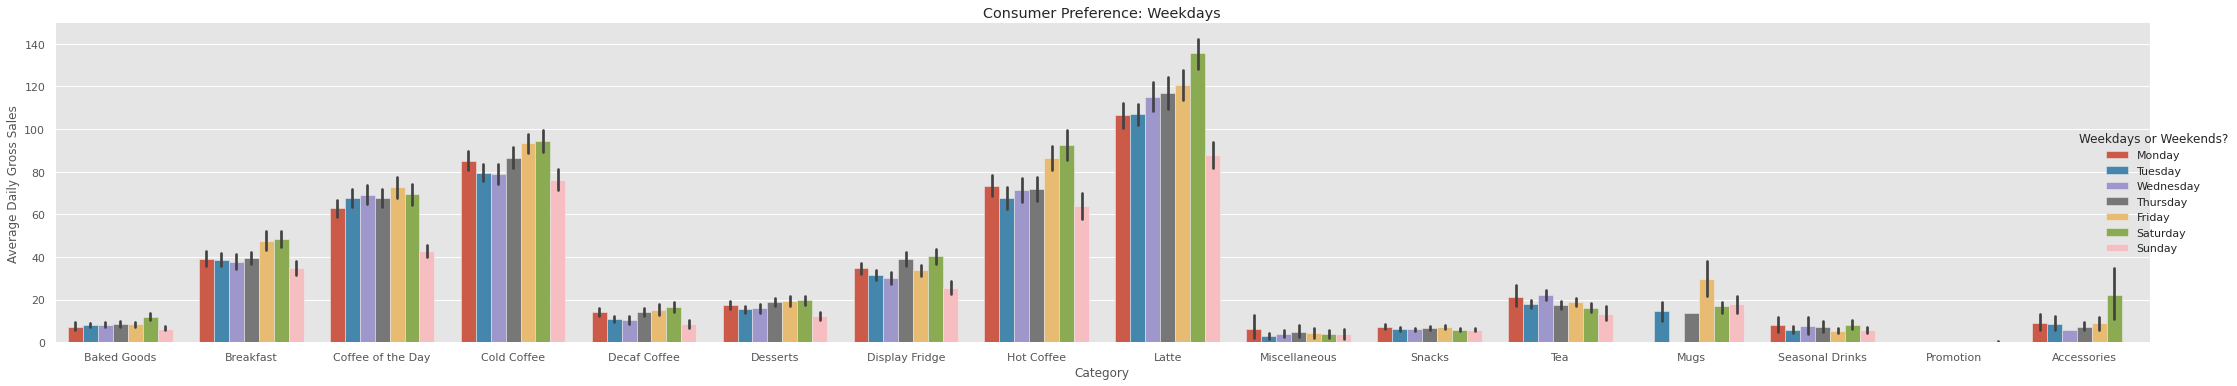

In [ ]:
wk_plot = sns.catplot(x="Category", y="Gross Sales", hue="Weekday", kind="bar",aspect=6, data=df_wk)

plt.title("Consumer Preference: Weekdays")
plt.ylabel("Average Daily Gross Sales")
new_title = 'Weekdays or Weekends?'
wk_plot._legend.set_title(new_title)
new_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for t, l in zip(wk_plot._legend.texts, new_labels): t.set_text(l)

In [ ]:
df_wk_Cnt = df.groupby(["Date","Weekday","Category"])['Qty'].sum().reset_index()
df_wk_Cnt['Category'].astype('category')
df_wk_Cnt['Date'] = pd.to_datetime(df_wk['Date'])
df_wk_Cnt.head(20)

,Date,Weekday,Category,Qty
0,2018-10-05,4,Baked Goods,2
1,2018-10-05,4,Breakfast,5
2,2018-10-05,4,Coffee of the Day,26
3,2018-10-05,4,Cold Coffee,20
4,2018-10-05,4,Decaf Coffee,5
5,2018-10-05,4,Desserts,5
6,2018-10-05,4,Display Fridge,13
7,2018-10-05,4,Hot Coffee,16
8,2018-10-05,4,Latte,30
9,2018-10-05,4,Miscellaneous,1


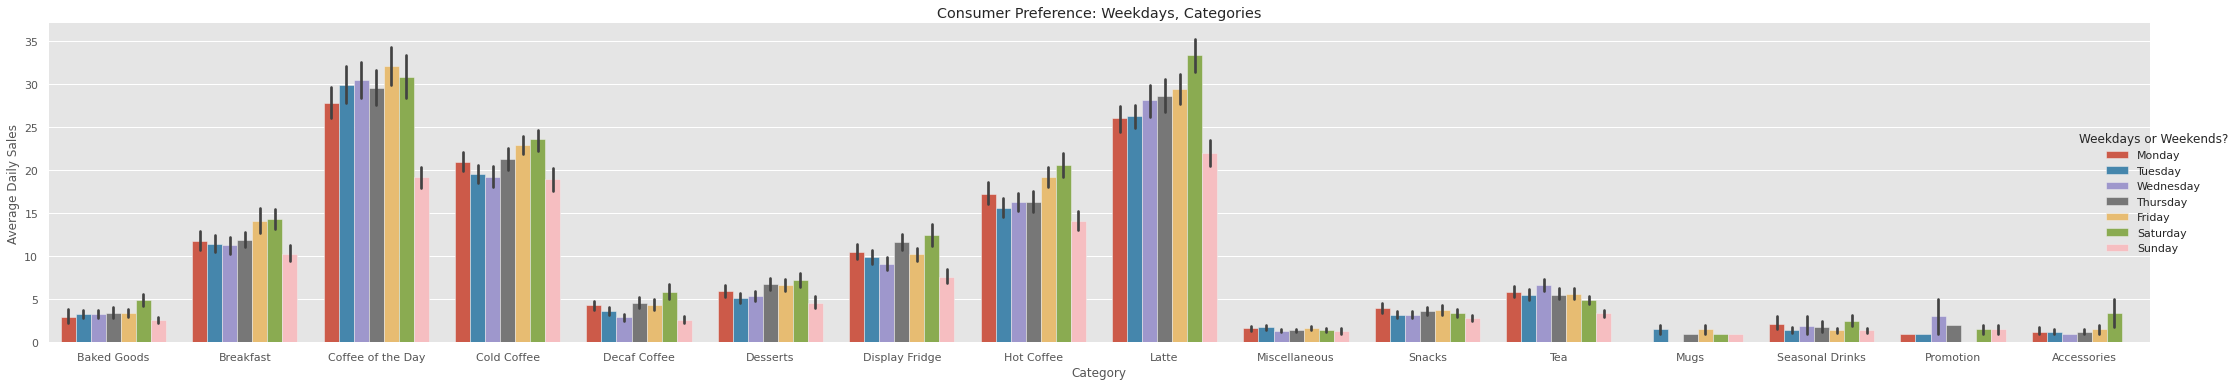

In [ ]:
wk_plot_Cnt = sns.catplot(x="Category", y="Qty", hue="Weekday", kind="bar",aspect=6, data=df_wk_Cnt)

plt.title("Consumer Preference: Weekdays, Categories")
plt.ylabel("Average Daily Sales")
new_title = 'Weekdays or Weekends?'
wk_plot_Cnt._legend.set_title(new_title)
new_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for t, l in zip(wk_plot_Cnt._legend.texts, new_labels): t.set_text(l)

In the plot above average daily sales are grouped by category and day of the week. As you can see weekly distributions follow roughly the same pattern across all categories. The drop in sales on Sunday can be explained by the store being open for 6.5 hours less on this day. Wednesday is the slowest day in most major categories followed closely by Tuesday. It makes sense that we see a spike in promotions on this slow day, yet they don't completely manage to make up the difference. 

In [ ]:
df_wk_Cnt_tm = df[df["Category"]=="Coffee of the Day"].groupby(["Date","Weekday","Item"])['Qty'].sum().reset_index()
df_wk_Cnt_tm['Date'] = pd.to_datetime(df_wk_Cnt_tm['Date'])
df_wk_Cnt_tm.head(20)

,Date,Weekday,Item,Qty
0,2018-10-05,4,Coffee of the Day,26
1,2018-10-06,5,Coffee of the Day,37
2,2018-10-07,6,Coffee of the Day,19
3,2018-10-08,0,Coffee of the Day,40
4,2018-10-09,1,Coffee of the Day,42
5,2018-10-10,2,Coffee of the Day,34
6,2018-10-11,3,Coffee of the Day,27
7,2018-10-12,4,Coffee of the Day,44
8,2018-10-13,5,Coffee of the Day,46
9,2018-10-14,6,Coffee of the Day,18


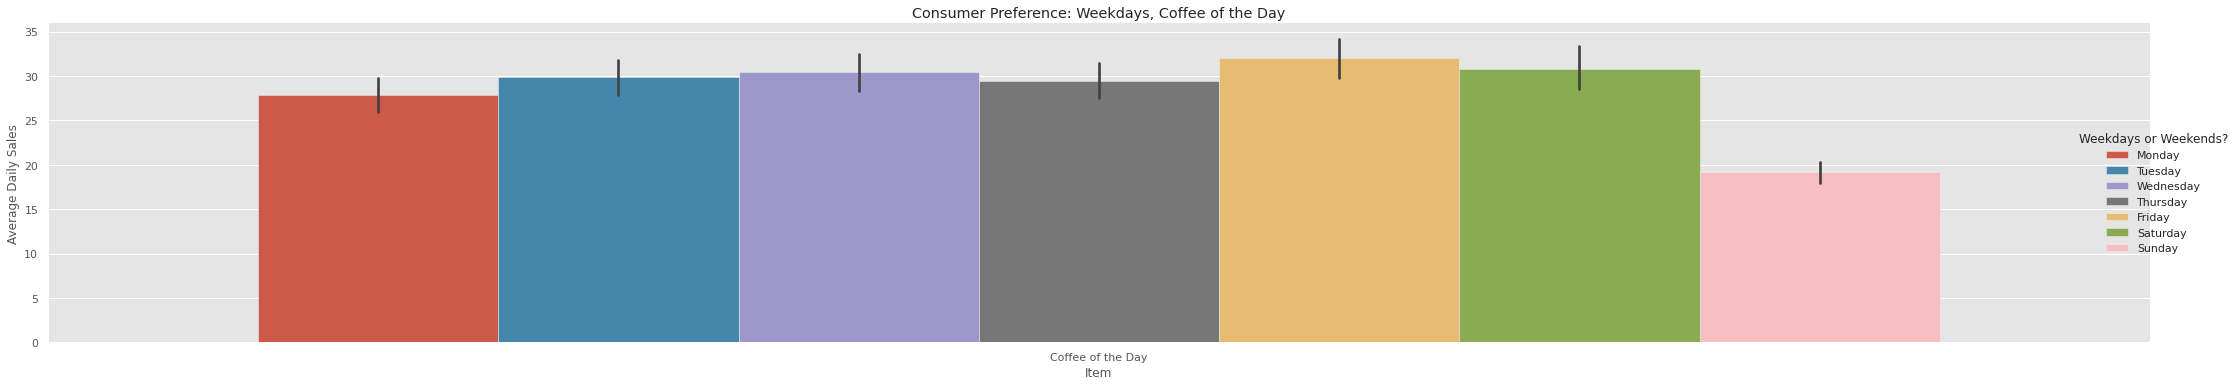

In [ ]:
wk_plot_Cnt_tm = sns.catplot(x="Item", y="Qty", hue="Weekday", kind="bar",aspect=6, data=df_wk_Cnt_tm)

plt.title("Consumer Preference: Weekdays, Coffee of the Day")
plt.ylabel("Average Daily Sales")
new_title = 'Weekdays or Weekends?'
wk_plot_Cnt_tm._legend.set_title(new_title)
new_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for t, l in zip(wk_plot_Cnt_tm._legend.texts, new_labels): t.set_text(l)
box_margin_plot.set_xticklabels(rotation=30)

The plot above demonstrates the average sales volume by day of the week for coffee of the day. We can see that coffee of the day is most popular on friday and least popular on Monday, excluding Sunday for which dips in sales are likely related to shorter store hours. According to the previous graph 'Consumer Preferences: Weekdays, Categories' we see that Monday is not a top performing day in any category. Promoting a fun and festive coffee of the day on Monday could be especially useful for driving traffic, since CotD is popular throughout the week.

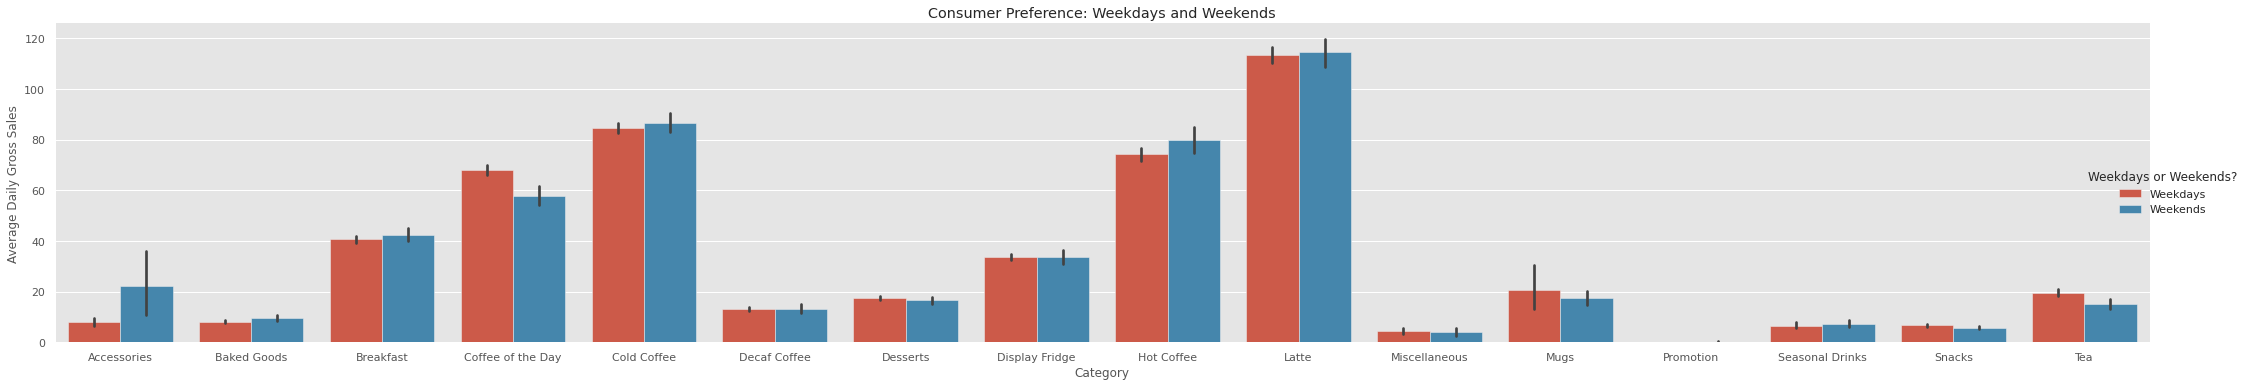

In [ ]:
wknd_plot = sns.catplot(x="Category", y="Gross Sales", hue="isWeekend", kind="bar",aspect=6, data=df_wknd)

plt.title("Consumer Preference: Weekdays and Weekends")
plt.ylabel("Average Daily Gross Sales")
new_title = 'Weekdays or Weekends?'
wknd_plot._legend.set_title(new_title)
new_labels = ['Weekdays', 'Weekends']
for t, l in zip(wknd_plot._legend.texts, new_labels): t.set_text(l)

#### 4.2 *Summer and Winter*

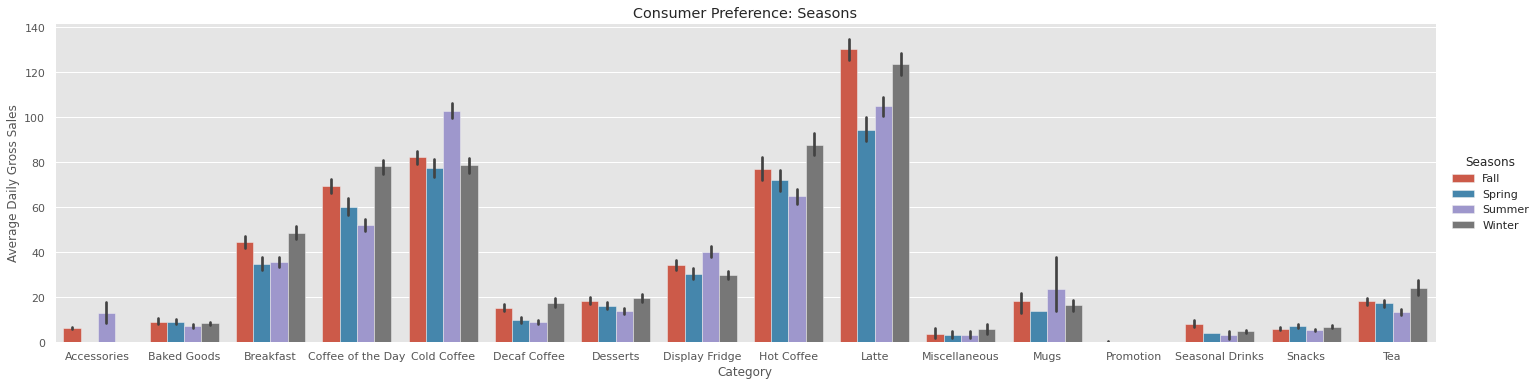

In [ ]:
df["Month"] = df['TimeStamp'].dt.month
df["Season"] = "Winter"
df.loc[(df["Month"]>=3)&(df["Month"]<6),"Season"] = "Spring"
df.loc[(df["Month"]>=6)&(df["Month"]<9),"Season"] = "Summer"
df.loc[(df["Month"]>=9)&(df["Month"]<12),"Season"] = "Fall"

df_season = df.groupby(["Season","Category","Date"])['Gross Sales'].sum().reset_index()

season_plot = sns.catplot(x="Category", y="Gross Sales", hue="Season", kind="bar",aspect=4, data=df_season)

plt.title("Consumer Preference: Seasons")
plt.ylabel("Average Daily Gross Sales")
new_title = 'Seasons'
season_plot._legend.set_title(new_title)

#### 4.3 *Pre-Covid and Post-Covid*

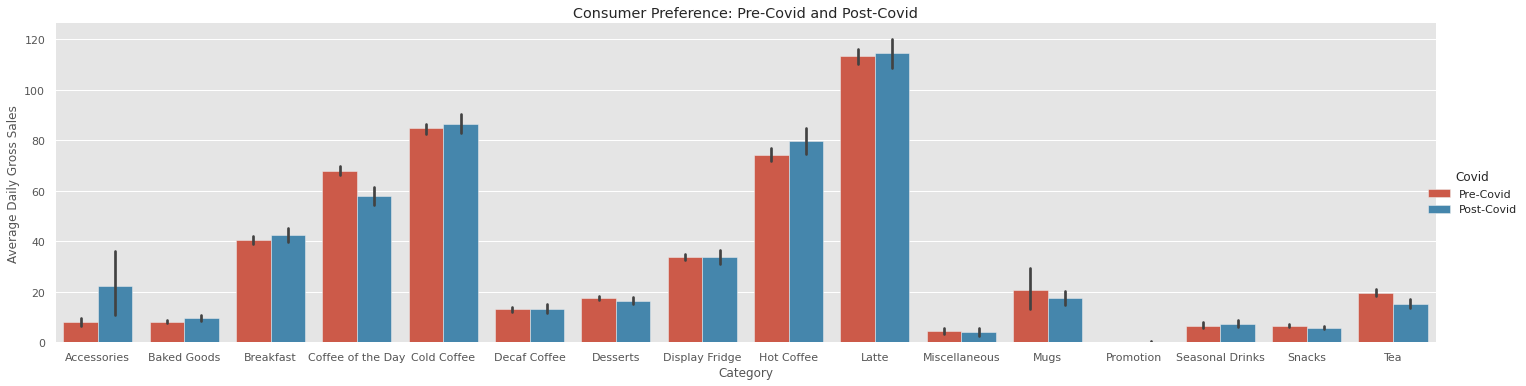

In [ ]:
df["Covid"] = (df["TimeStamp"]>="2020-10-1")

df_Covid = df.groupby(["isWeekend","Category","Date"])['Gross Sales'].sum().reset_index()

Covid_plot = sns.catplot(x="Category", y="Gross Sales", hue="isWeekend", kind="bar",aspect=4, data=df_Covid)

plt.title("Consumer Preference: Pre-Covid and Post-Covid")
plt.ylabel("Average Daily Gross Sales")
new_title = 'Covid'
Covid_plot._legend.set_title(new_title)
new_labels = ['Pre-Covid', 'Post-Covid']
for t, l in zip(Covid_plot._legend.texts, new_labels): t.set_text(l)

### Consumer Preference: Pre-COVID and Post-COVID


# Part III: Summary of Recommendations

## Recommendation 1
Cut the size of the menu (seasonally)

We recommend that the coffee shop adjusts their menu by season to account for changing popularity of their items. It is demonstrable that the following items become more popular (higher average daily sales) during the respective seasons:
1. Hot coffee in winter
2. Tea in winter
3. Cold coffee in summer
4. Lattes in the fall

## Recommendation 2
Coffee of the day recommendations: check the preferred coffee for the weekday, weekend, and by season. When looking at the total sales of coffee of the day compared to the total profits it produces, it becomes clear that there is a large portion of profits that are being missed out on with the coffee of the day. We recommend raising the price for the coffe that peaks during these times to increase profits per sale of one of the largest sellers that produces shockingly low profits comparatively

Monday is not a top performing day in any category. Promoting a fun and festive coffee of the day on Monday could be especially useful for driving traffic, since CotD is popular throughout the week.